In [1]:
from analysis import scan
from analysis import tools
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = 16, 6

In [2]:
# paths

path_to_study = '/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/the_cycle'

### dfs ###

# coll1 #

zno_500_c1 = scan.scan(f'{path_to_study}/coll1/ZnO/ZnO_B3_500.hdf5')
zno_501_c1 = scan.scan(f'{path_to_study}/coll1/ZnO/ZnO_B3_501.hdf5')
h2o_ref_c1 = scan.scan(f'{path_to_study}/coll1/H2O/H2O.hdf5')

lif_152_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_152.hdf5')
lif_157_c1 = scan.scan(f'{path_to_study}/coll1/LiF/LiF_B2_157.hdf5')

baf_185_c1 = scan.scan(f'{path_to_study}/coll1/BaF/BaF_B2_185.hdf5')
baf_194_c1 = scan.scan(f'{path_to_study}/coll1/BaF/BaF_B2_194.hdf5')

# coll2 #

zno_500_c2 = scan.scan(f'{path_to_study}/coll2/ZnO/ZnO_B3_500.hdf5')
zno_501_c2 = scan.scan(f'{path_to_study}/coll2/ZnO/ZnO_B3_501.hdf5')
h2o_ref_c2 = scan.scan(f'{path_to_study}/coll2/H2O/H2O.hdf5')

lif_152_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_152.hdf5')
lif_157_c2 = scan.scan(f'{path_to_study}/coll2/LiF/LiF_B2_157.hdf5')

baf_185_c2 = scan.scan(f'{path_to_study}/coll2/BaF/BaF_B2_185.hdf5')
baf_194_c2 = scan.scan(f'{path_to_study}/coll2/BaF/BaF_B2_194.hdf5')

# coll3 #

zno_500_c3 = scan.scan(f'{path_to_study}/coll3/ZnO/ZnO_B3_500.hdf5')
zno_501_c3 = scan.scan(f'{path_to_study}/coll3/ZnO/ZnO_B3_501.hdf5')
h2o_ref_c3 = scan.scan(f'{path_to_study}/coll3/H2O/H2O.hdf5')

lif_152_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_152.hdf5')
lif_157_c3 = scan.scan(f'{path_to_study}/coll3/LiF/LiF_B2_157.hdf5')

baf_185_c3 = scan.scan(f'{path_to_study}/coll3/BaF/BaF_B2_185.hdf5')
baf_194_c3 = scan.scan(f'{path_to_study}/coll3/BaF/BaF_B2_194.hdf5')

# coll4 #

zno_500_c4 = scan.scan(f'{path_to_study}/coll4/ZnO/ZnO_B3_500.hdf5')
zno_501_c4 = scan.scan(f'{path_to_study}/coll4/ZnO/ZnO_B3_501.hdf5')
h2o_ref_c4 = scan.scan(f'{path_to_study}/coll4/H2O/H2O_(1).hdf5')

lif_152_c4 = scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_152.hdf5')
lif_157_c4 = scan.scan(f'{path_to_study}/coll4/LiF/LiF_B2_157.hdf5')

baf_185_c4 = scan.scan(f'{path_to_study}/coll4/BaF/BaF_B2_185.hdf5')
baf_194_c4 = scan.scan(f'{path_to_study}/coll4/BaF/BaF_B2_194.hdf5')

# coll5 #

zno_500_c5 = scan.scan(f'{path_to_study}/coll5/ZnO/ZnO_B3_500.hdf5')
zno_501_c5 = scan.scan(f'{path_to_study}/coll5/ZnO/ZnO_B3_501.hdf5')
h2o_ref_c5 = scan.scan(f'{path_to_study}/coll5/H2O/H2O_(1).hdf5')

lif_152_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_152_260.hdf5')
lif_152_430_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_152_430.hdf5')

lif_157_260_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_157_260.hdf5')
lif_157_430_c5 = scan.scan(f'{path_to_study}/coll5/LiF/LiF_B2_157_430.hdf5')

baf_185_250_c5 = scan.scan(f'{path_to_study}/coll5/BaF/BaF_B2_185_250.hdf5')

baf_194_250_c5 = scan.scan(f'{path_to_study}/coll5/BaF/BaF_B2_194.hdf5')

In [3]:
def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

def two_gauss(x,m1,m2,s1,s2,A1,A2):
    return gaussian(x,m1,s1,A1) + gaussian(x,m2,s2,A2)

def plot(scan, wl,t, ori='unk', plot=True, label=None):
    
    df     = scan.df.loc[(f'{wl}', f'{ori}', f'{t}sec')]
    meta   = scan.meta_df.loc[(f'{wl}', f'{ori}', f'{t}sec')]
    pw     = float(meta['pw'][0])

    sp_x   = np.array(df.loc[('sp_0')]['em_wl']);  sp_y   = np.array(df.loc[('sp_0')]['count'])
    bg_x   = np.array(df.loc[('bg_0')]['em_wl']);  bg_y   = np.array(df.loc[('bg_0')]['count'])
    
    sp_sub = np.subtract(sp_y, bg_y)
    
    # gain
    gain = int(meta['gain'].split('x')[0])

    # t_exp
    t_exp = float(t)
    
    # total number of photons calc
    E = (const.h * const.c) / (int(wl)*1e-7) # energy of one photon of wavelength: wl
    tot_E = pw * t_exp
    N_ph  = tot_E / E;
    
    norm = t_exp * gain * pw * 1e6  #*N_ph

    sp_norm  = np.divide(sp_sub,norm)
    
    
    # set limit
    sorted_indices = np.argsort(sp_norm)[::-1]
    top_twen_values = sp_norm[sorted_indices[:10]]
    
    mean = np.mean(top_twen_values)
    lim  = mean*1.4

    
    if plot == True:
        plt.plot(sp_x, sp_norm, label = label)
        plt.grid("on")
        plt.xlabel('Emission Wavelength [nm]')
        plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
        plt.ylim(0,lim)
        plt.legend()
    
    return sp_x, sp_norm

def calc_diff(scan1,scan2, wl, t, toplot=True, sample='unk', high='2', low='1'):
    
    col = 'darkblue'

    sp_x_1, sp_norm_1 = plot(scan1, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(scan2, wl, t, plot=False)

    diff = np.subtract(sp_norm_2, sp_norm_1)
    
    if toplot == True:
        plt.plot(sp_x_1, diff, color=col)
        plt.ylim(-1.5e-15,3.5e-14)

        plt.xlabel('Emission Wavelength [nm]')
        plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
        plt.grid("on")
        plt.title(f'LiF {sample} coll{high} - coll{low}', fontsize = 20)

        plt.show();
    
    return sp_x_1, diff

# References

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


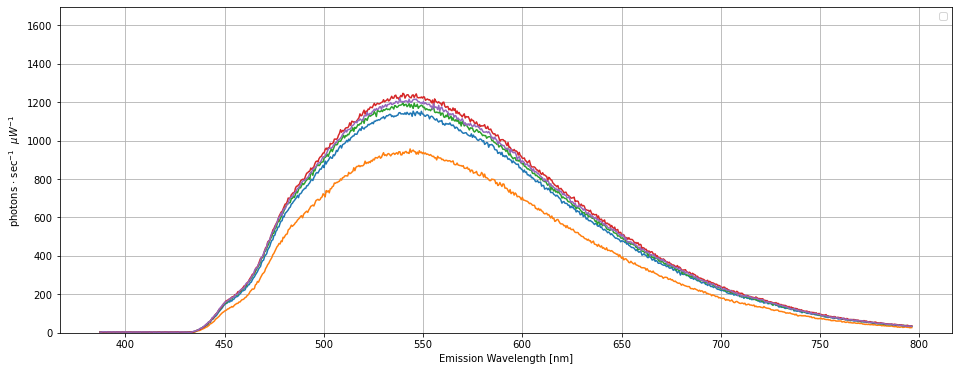

In [71]:
plot(zno_500_c1, '400', '1.0'); plot(zno_500_c2, '400', '1.0'); plot(zno_500_c3, '400', '1.0'); plot(zno_500_c4, '400', '1.0'); plot(zno_500_c5, '400', '1.0');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


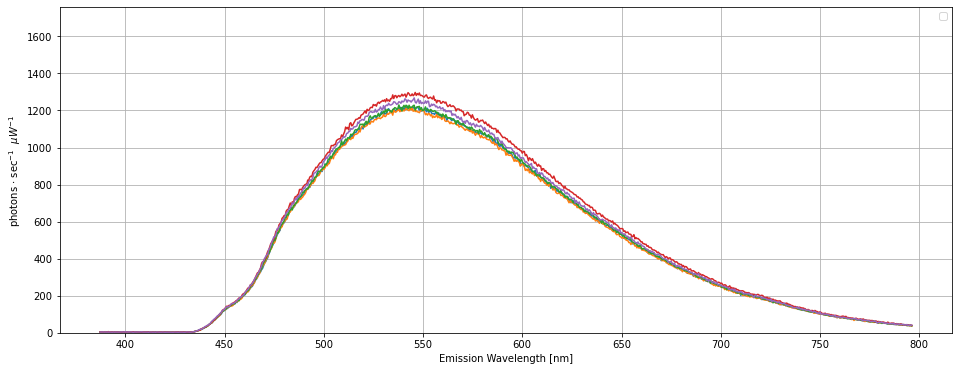

In [72]:
plot(zno_501_c1, '400', '1.0'); plot(zno_501_c2, '400', '1.0'); plot(zno_501_c3, '400', '1.0'); plot(zno_501_c4, '400', '1.0'); plot(zno_501_c5, '400', '1.0');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


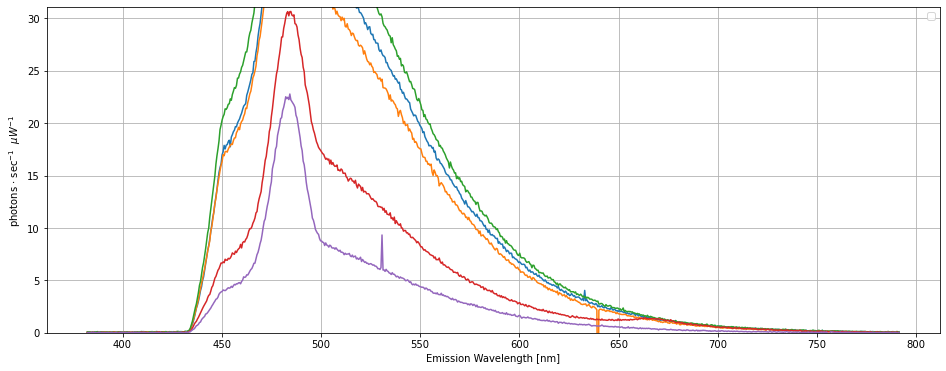

In [73]:
plot(h2o_ref_c1, '420', '30.0'); plot(h2o_ref_c2, '420', '30.0'); plot(h2o_ref_c3, '420', '30.0'); plot(h2o_ref_c4, '420', '30.0'); plot(h2o_ref_c5, '420', '30.0');

# LiF

Below is some code that plots all 4 graphs for LiF: two for each sample, coll2 - coll1 and coll3 - coll1.
wl goes from 250 to 600 (str) and t is 30.0 for central wavelengths and 45.0 for outer.

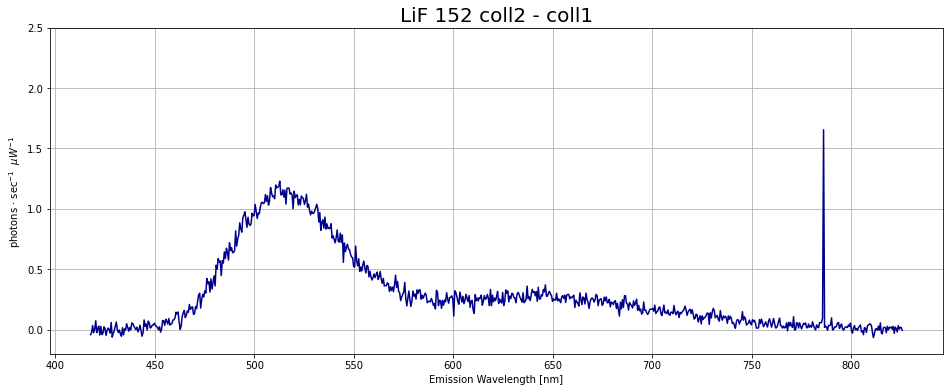

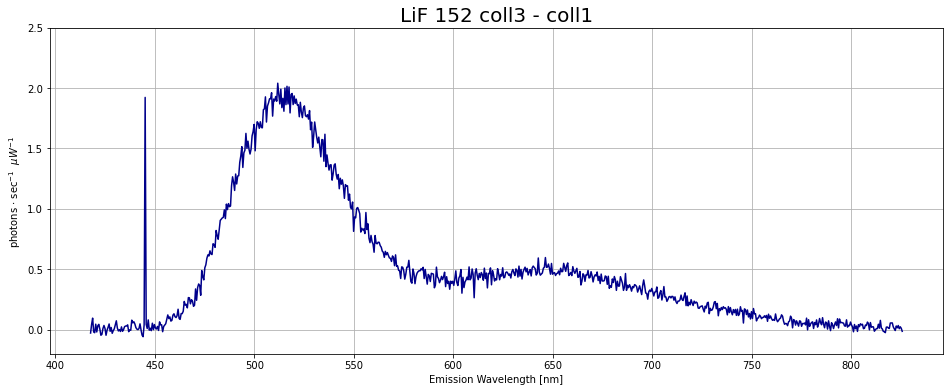

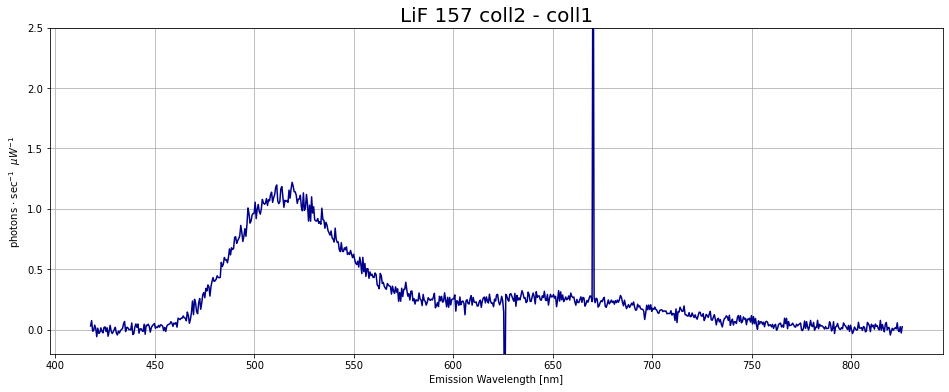

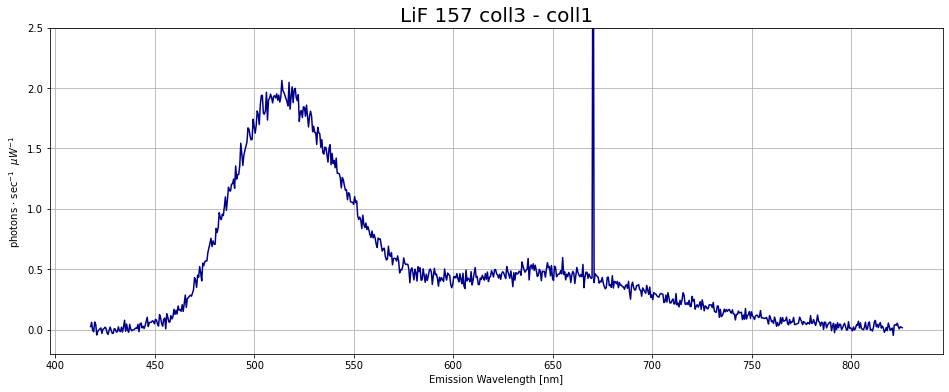

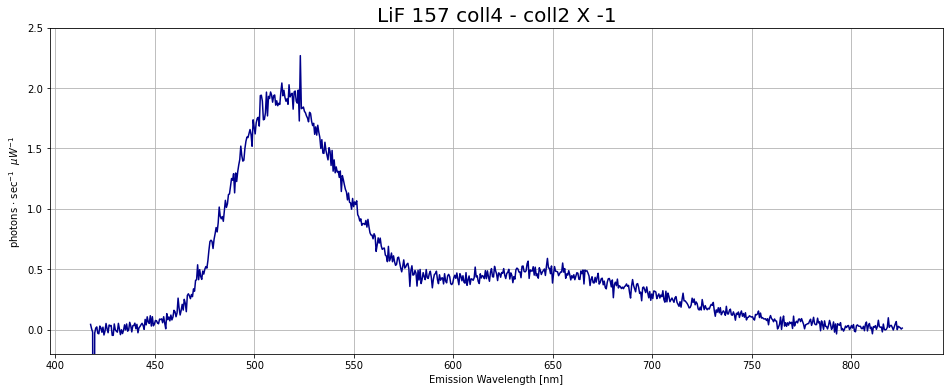

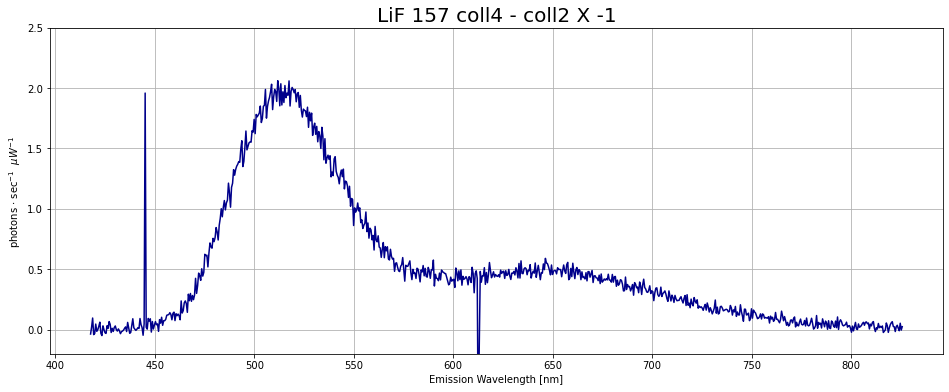

In [92]:
wl = '430'; t = '30.0'
col = 'darkblue'

sp_x_1, sp_norm_1 = plot(lif_152_c1, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_152_c2, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,2.5)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 152 coll2 - coll1', fontsize = 20)

plt.show();

sp_x_2, sp_norm_2 = plot(lif_152_c1, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_152_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,2.5)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 152 coll3 - coll1', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(lif_157_c1, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(lif_157_c2, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,2.5)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll2 - coll1', fontsize = 20)

plt.show();

sp_x_2, sp_norm_2 = plot(lif_157_c1, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_157_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,2.5)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll3 - coll1', fontsize = 20)

plt.show();

sp_x_2, sp_norm_2 = plot(lif_157_c3, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_157_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)*(-1)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,2.5)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll4 - coll2 X -1', fontsize = 20)

plt.show();

sp_x_2, sp_norm_2 = plot(lif_152_c3, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_152_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)*(-1)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,2.5)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll4 - coll2 X -1', fontsize = 20)

plt.show();

### BaF

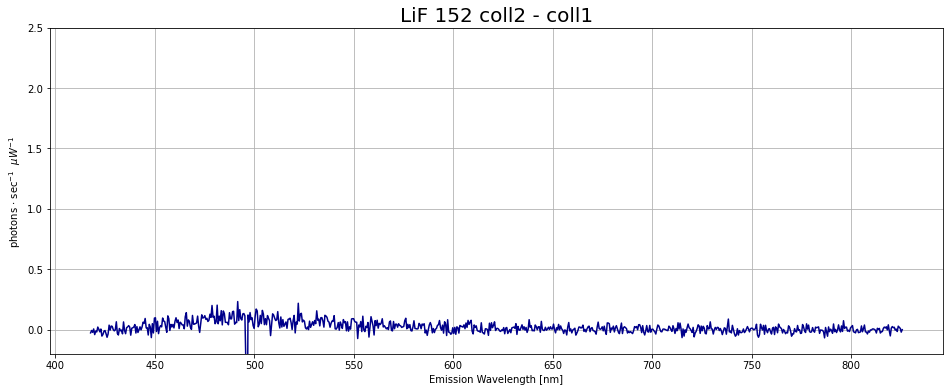

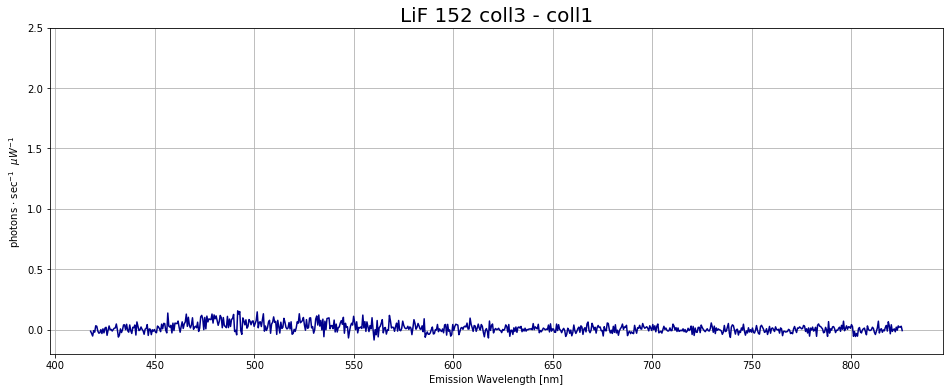

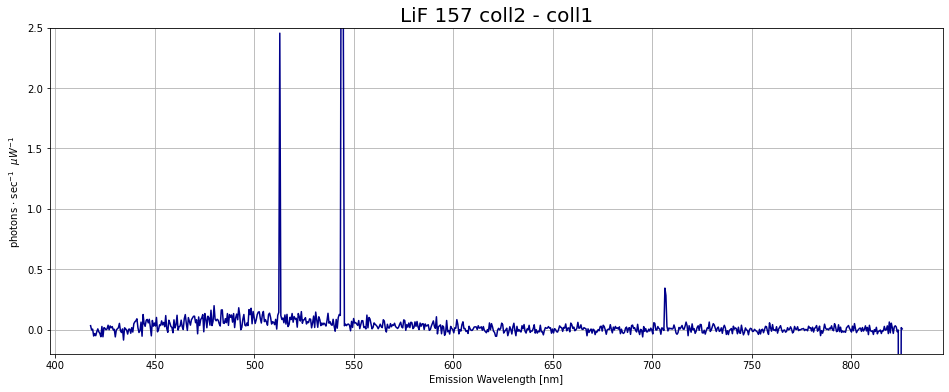

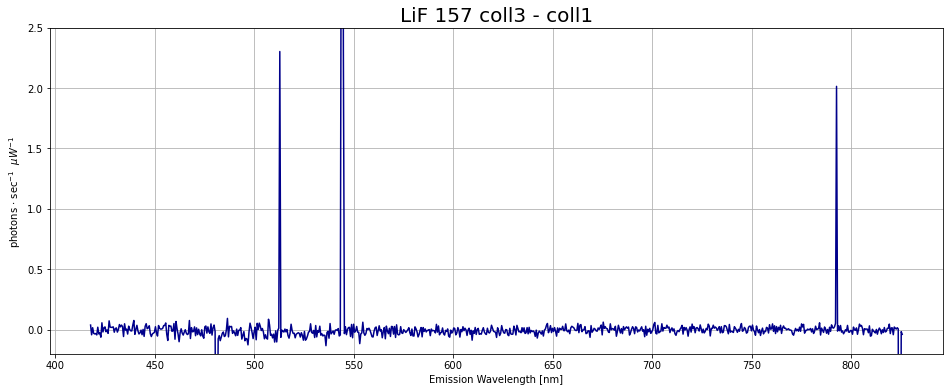

In [4]:
wl = '430'; t = '30.0'
col = 'darkblue'

sp_x_1, sp_norm_1 = plot(baf_185_c1, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(baf_185_c2, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,2.5)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 152 coll2 - coll1', fontsize = 20)

plt.show();

sp_x_2, sp_norm_2 = plot(baf_185_c1, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(baf_185_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,2.5)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 152 coll3 - coll1', fontsize = 20)

plt.show();

sp_x_1, sp_norm_1 = plot(baf_194_c1, wl, t, plot=False); sp_x_2, sp_norm_2 =  plot(baf_194_c2, wl, t, plot=False)

diff = np.subtract(sp_norm_2, sp_norm_1)
plt.plot(sp_x_1, diff, color=col)
plt.ylim(-0.2,2.5)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll2 - coll1', fontsize = 20)

plt.show();

sp_x_2, sp_norm_2 = plot(baf_194_c1, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(baf_194_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,2.5)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll3 - coll1', fontsize = 20)

plt.show();

# LiF
Below I will extract data only from 430nm (since the filters don't cut the signal). I fit it to a two Gaussian model, then plot the signal strenght as a function of dose.

# 430nm Analysis

## LiF_B2_152

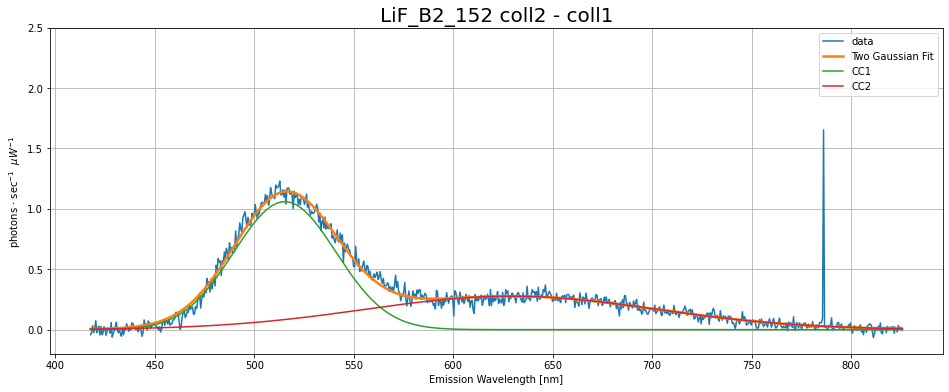

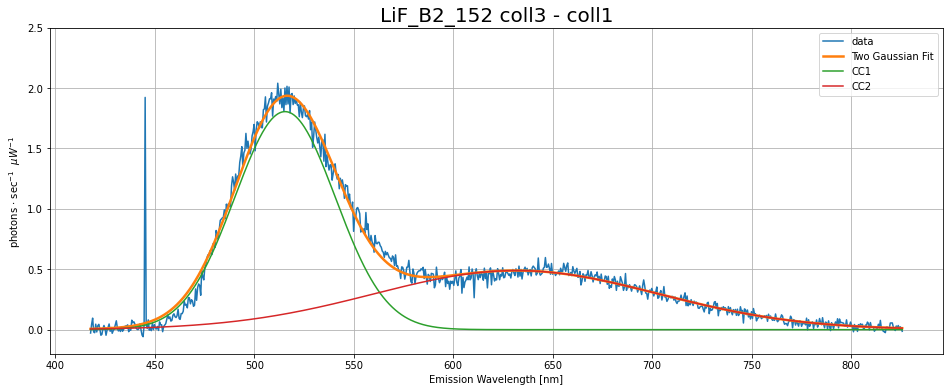

mean1: 0.043077587815202156
mean2: 4.48212271538046
std1: 0.07010123806390264
std2: 4.3188917042785375
A1: 0.00028186125925603906
A2: 4.813339400336076e-05


In [80]:
tot_areas = []
cc1_areas = []
cc2_areas = []

x1, y1 = calc_diff(lif_152_c1, lif_152_c2, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,2,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,2.5)
plt.title("LiF_B2_152 coll2 - coll1", fontsize=20)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

###

x1, y1 = calc_diff(lif_152_c1, lif_152_c3, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,2,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title("LiF_B2_152 coll3 - coll1", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,2.5)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_152_tot = tot_areas
lif_152_cc1 = cc1_areas
lif_152_cc2 = cc2_areas

print(r'mean1: ' + str(pcov[0][0]))
print(r'mean2: ' + str(pcov[1][1]))
print(r'std1: ' + str(pcov[2][2]))
print(r'std2: ' + str(pcov[3][3]))
print(r'A1: ' + str(pcov[4][4]))
print(r'A2: ' + str(pcov[5][5]))

### LiF_B2_157

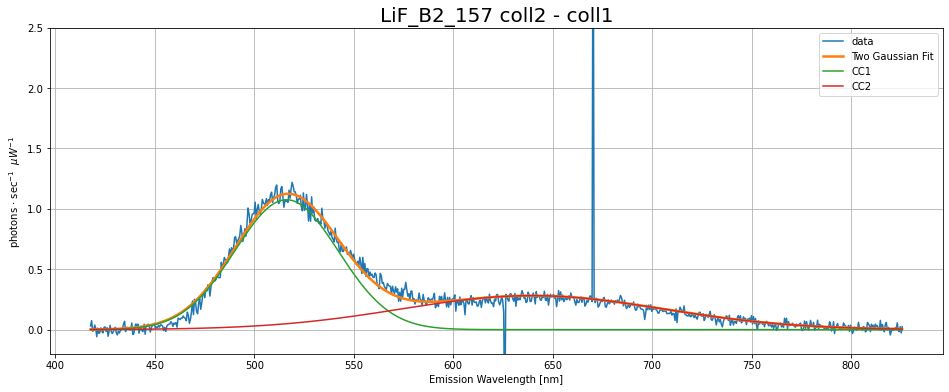

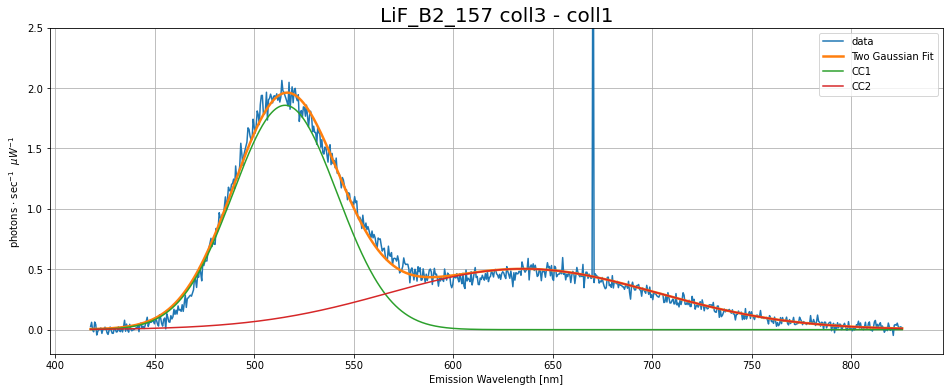

In [82]:
tot_areas = []
cc1_areas = []
cc2_areas = []

x1, y1 = calc_diff(lif_157_c1, lif_157_c2, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,2,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title("LiF_B2_157 coll2 - coll1", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,2.5)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

###

x1, y1 = calc_diff(lif_157_c1, lif_157_c3, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,2,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title("LiF_B2_157 coll3 - coll1", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.ylim(-0.2,2.5)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_157_tot = tot_areas
lif_157_cc1 = cc1_areas
lif_157_cc2 = cc2_areas

# Plotting signal as a function of dose

In [83]:
# activity of Co60 0.37mCi

act = 0.37 * 3.7e7
t_first = 226800
t_second = 151200
lif_rate = 128.6e-15
baf_rate = 87.1e-15

dose_1_lif  = act*t_first*lif_rate
dose_2_lif  = dose_1_lif + act*t_second*lif_rate

dose_1_baf  = act*t_first*baf_rate
dose_2_baf  = dose_1_baf + act*t_second*baf_rate

lif_doses = [dose_1_lif, dose_2_lif]; baf_doses = [dose_1_baf, dose_2_baf]

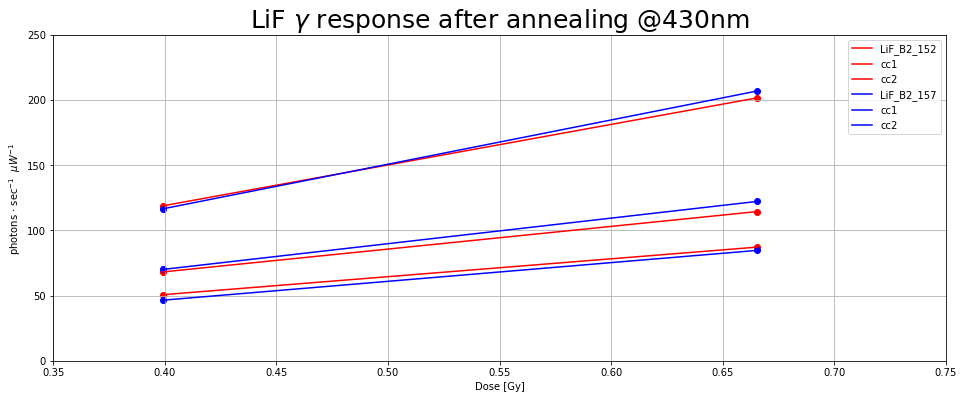

In [89]:
plt.scatter(lif_doses, lif_152_tot, color='red'); plt.plot(lif_doses, lif_152_tot, color='red', label = 'LiF_B2_152')
plt.scatter(lif_doses, lif_152_cc1, color='red'); plt.plot(lif_doses, lif_152_cc1, color='red', label = 'cc1')
plt.scatter(lif_doses, lif_152_cc2, color='red'); plt.plot(lif_doses, lif_152_cc2, color='red', label = 'cc2')


plt.scatter(lif_doses, lif_157_tot, color='blue'); plt.plot(lif_doses, lif_157_tot, color='blue', label = 'LiF_B2_157')
plt.scatter(lif_doses, lif_157_cc1, color='blue'); plt.plot(lif_doses, lif_157_cc1, color='blue', label = 'cc1')
plt.scatter(lif_doses, lif_157_cc2, color='blue'); plt.plot(lif_doses, lif_157_cc2, color='blue', label = 'cc2')

plt.xlim(0.35,0.75)
plt.ylim(0,250)
plt.legend()
plt.xlabel('Dose [Gy]')
plt.ylabel(r'photons $\cdot$ sec$^{-1}$  ${\mu W}^{-1}$')
plt.title(r'LiF $\gamma$ response after annealing @430nm', fontsize = 25)
plt.grid("on")

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


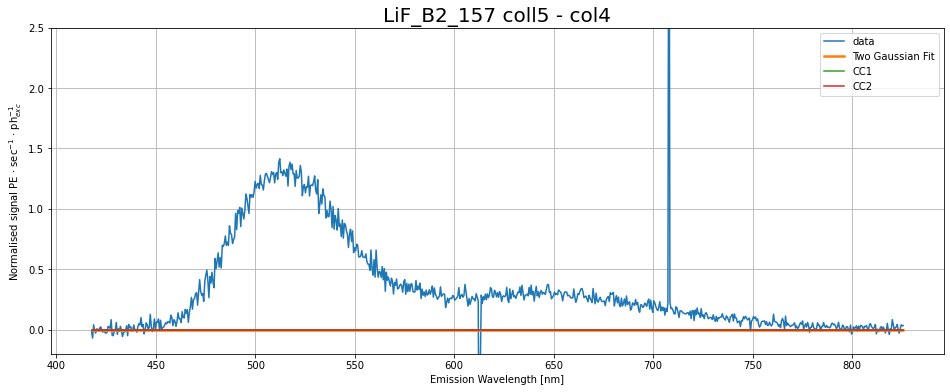

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


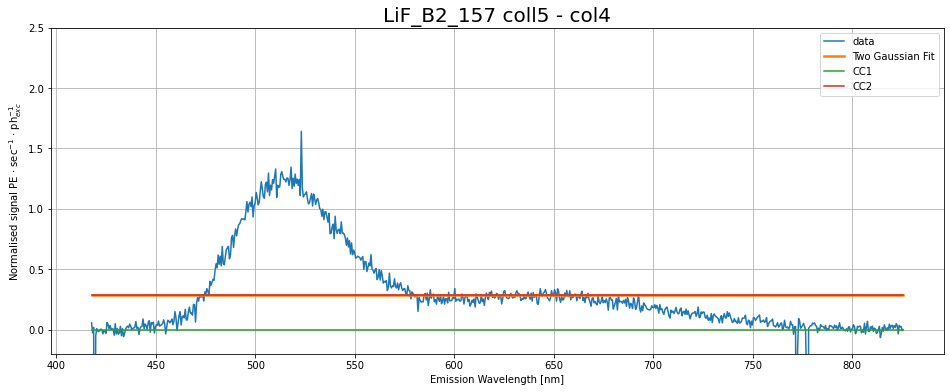

In [7]:
###

x1, y1 = calc_diff(lif_152_c4, lif_152_430_c5, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1e-12,1e-12])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title("LiF_B2_157 coll5 - col4", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'Normalised signal PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.ylim(-0.2,2.5)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_157_tot = tot_areas
lif_157_cc1 = cc1_areas
lif_157_cc2 = cc2_areas

###

x1, y1 = calc_diff(lif_157_c4, lif_157_430_c5, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1e-12,1e-12])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title("LiF_B2_157 coll5 - col4", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'Normalised signal PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.ylim(-0.2,2.5)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_157_tot = tot_areas
lif_157_cc1 = cc1_areas
lif_157_cc2 = cc2_areas

## The ratios correspond to the signal ratios

- lif_dose_1 / lif_dose_2 = 0.6
- tot_sig_1 / tot_sig_2 = 0.5895693655604697
- cc1_sig_1 / cc1_sig_2 = 0.5956764467968685
- cc2_sig_1 / cc2_sig_2 = 0.5815534767004361


---

# LiF


# 450nm Analysis
**Complications:** Signal is cut due to longpass.
The fit at 440 and 450 doesn't work so well.

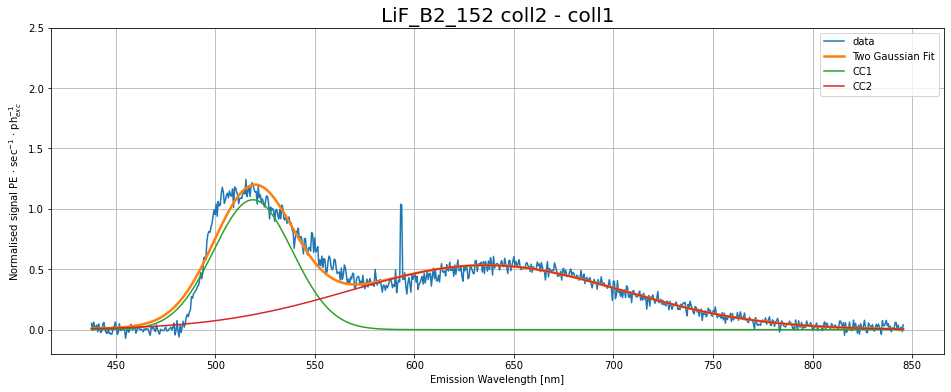

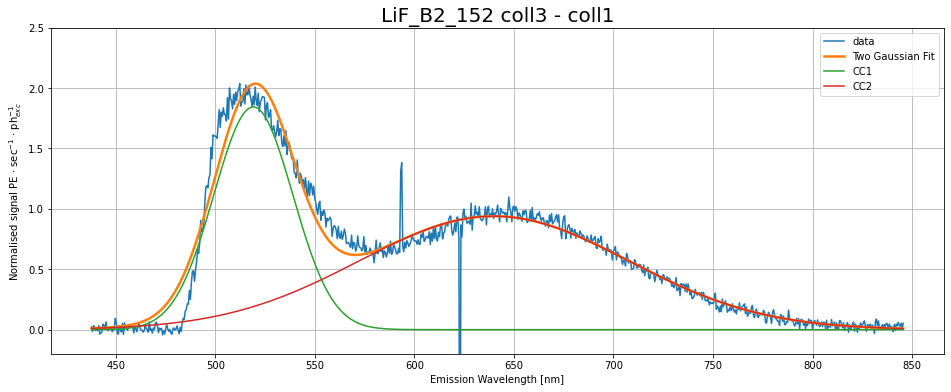

In [9]:
tot_areas = []
cc1_areas = []
cc2_areas = []

start = 1

x1, y1 = calc_diff(lif_152_c1, lif_152_c2, '450', '30.0', toplot = False)
x_cut = x1[start:]; y_cut = y1[start:]
popt, pcov = curve_fit(two_gauss,x_cut, y_cut, p0=[530,680,20,80,1,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'Normalised signal PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.ylim(-0.2,2.5)
plt.title("LiF_B2_152 coll2 - coll1", fontsize=20)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

###

x1, y1 = calc_diff(lif_152_c1, lif_152_c3, '450', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1,1])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.title("LiF_B2_152 coll3 - coll1", fontsize=20)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'Normalised signal PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.ylim(-0.2,2.5)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_152_tot = tot_areas
lif_152_cc1 = cc1_areas
lif_152_cc2 = cc2_areas

# The effect of annealing on LiF: returns to same spot even after 2 separate irradiations:|

Text(0.5, 1.0, 'LiF_B2_152 Annealing irradiation cycle')

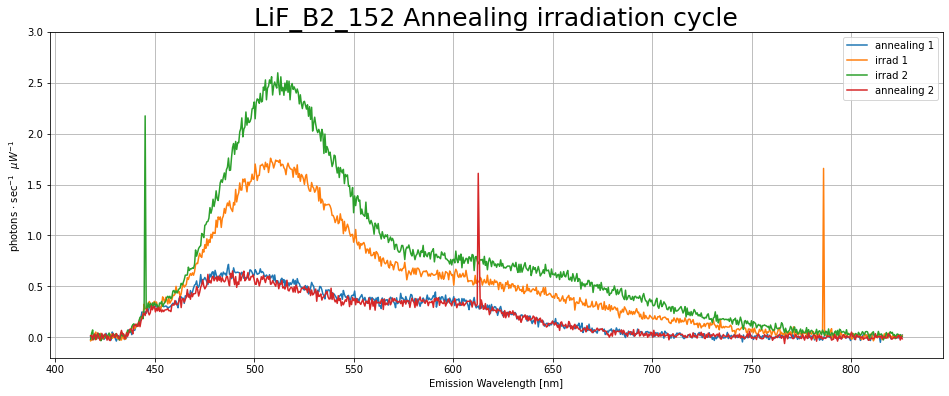

In [12]:
plot(lif_152_c1, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 1')
plot(lif_152_c2, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 1')
plot(lif_152_c3, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 2')
plot(lif_152_c4, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 2');
plt.ylim(-0.2,3)
plt.title('LiF_B2_152 Annealing irradiation cycle', fontsize=25)

Text(0.5, 1.0, 'LiF_B2_157 Annealing irradiation cycle')

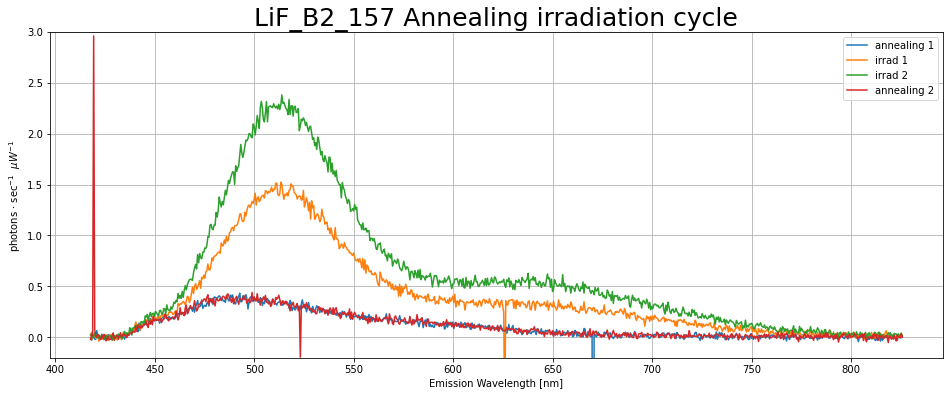

In [13]:
plot(lif_157_c1, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 1')
plot(lif_157_c2, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 1')
plot(lif_157_c3, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 2')
plot(lif_157_c4, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 2');
plt.ylim(-0.2,3)
plt.title('LiF_B2_157 Annealing irradiation cycle', fontsize=25)

# The effect of annealing on BaF: returns to same spot even after irradiations (not all):

Text(0.5, 1.0, 'BaF_B2_185 Annealing irradiation cycle')

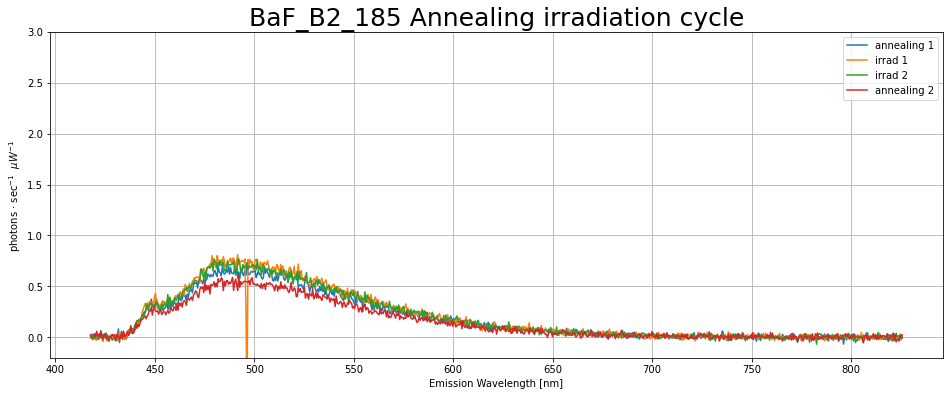

In [14]:
plot(baf_185_c1, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 1')
plot(baf_185_c2, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 1')
plot(baf_185_c3, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 2')
plot(baf_185_c4, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 2');
plt.ylim(-0.2,3)
plt.title('BaF_B2_185 Annealing irradiation cycle', fontsize=25)

Text(0.5, 1.0, 'BaF_B2_194 Annealing irradiation cycle')

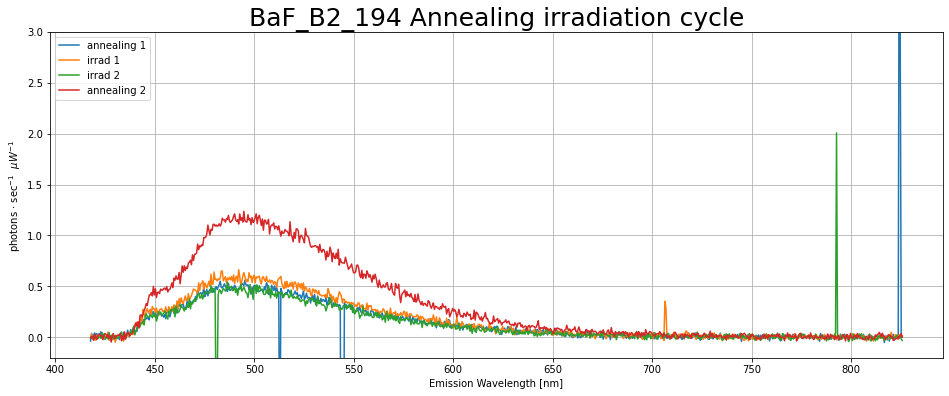

In [15]:
plot(baf_194_c1, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 1')
plot(baf_194_c2, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 1')
plot(baf_194_c3, '430' ,'30.0', ori='unk', plot=True, label = 'irrad 2')
plot(baf_194_c4, '430' ,'30.0', ori='unk', plot=True, label = 'annealing 2');
plt.ylim(-0.2,3)
plt.title('BaF_B2_194 Annealing irradiation cycle', fontsize=25)

# Matching the annealing of LiF with gamma-signal

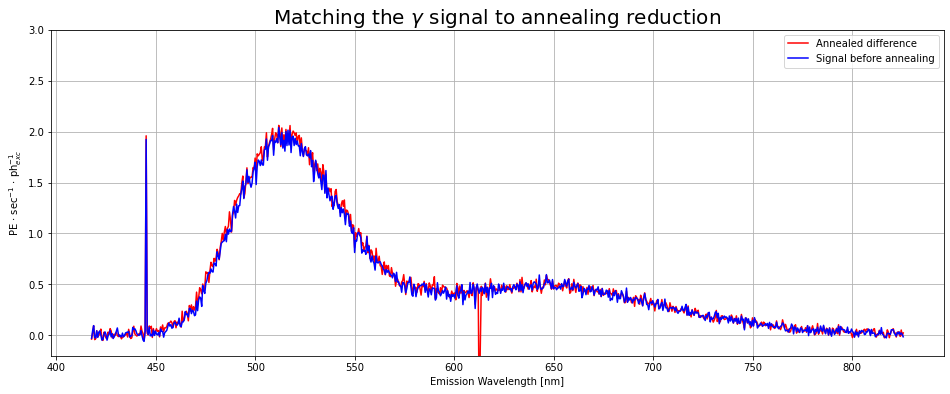

In [16]:
sp_x_2, sp_norm_2 = plot(lif_152_c3, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_152_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)*(-1)
plt.plot(sp_x_2, diff, color='red', label = 'Annealed difference')

sp_x_2, sp_norm_2 = plot(lif_152_c1, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_152_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color='blue', label = 'Signal before annealing')
plt.ylim(-0.2,3)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.grid("on")
plt.title(r'Matching the $\gamma$ signal to annealing reduction', fontsize = 20)

plt.legend()
plt.show();

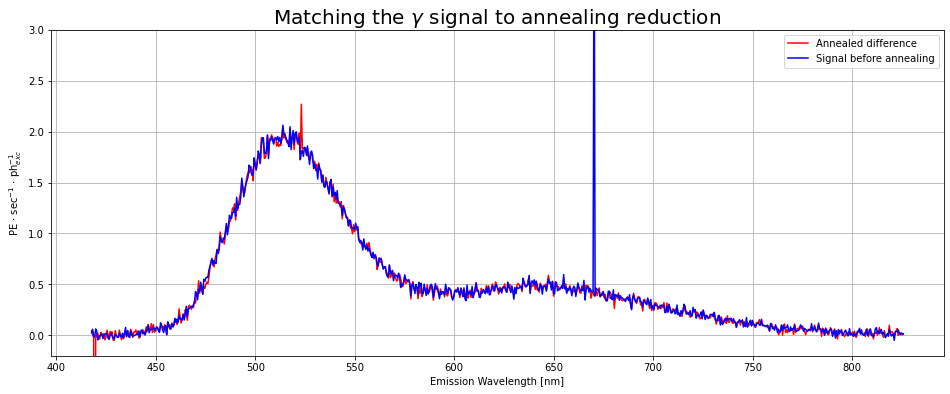

In [17]:
sp_x_2, sp_norm_2 = plot(lif_157_c3, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_157_c4, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)*(-1)
plt.plot(sp_x_2, diff, color='red', label = 'Annealed difference')

sp_x_2, sp_norm_2 = plot(lif_157_c1, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_157_c3, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color='blue', label = 'Signal before annealing')
plt.ylim(-0.2,3)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.grid("on")
plt.title(r'Matching the $\gamma$ signal to annealing reduction', fontsize = 20)

plt.legend()
plt.show();

# Cycle 2

# LiF_B2_152

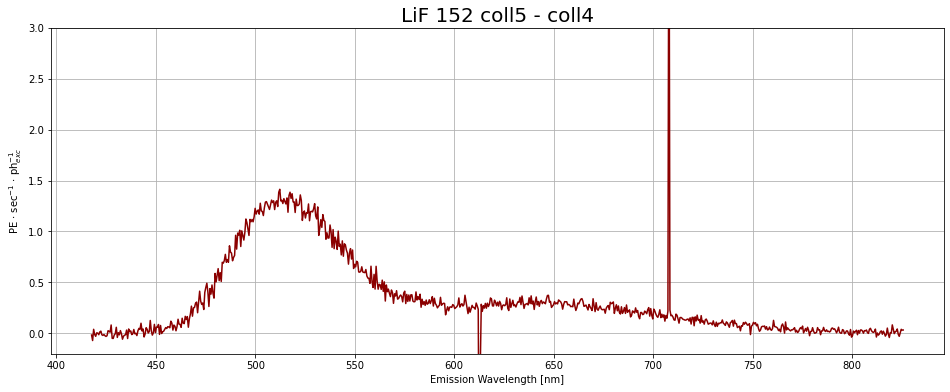

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


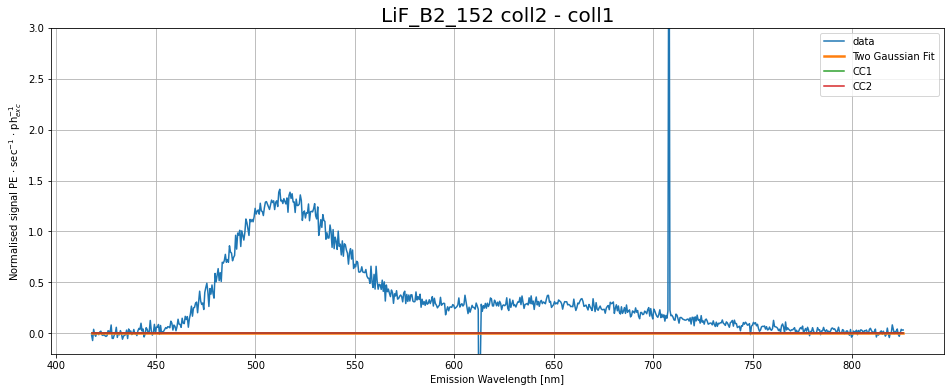

In [18]:
wl = '430'; t = '30.0'
col = 'darkred'

sp_x_2, sp_norm_2 = plot(lif_152_c4, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_152_430_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,3)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.grid("on")
plt.title('LiF 152 coll5 - coll4', fontsize = 20)

plt.show();

tot_areas = []
cc1_areas = []
cc2_areas = []

x1, y1 = calc_diff(lif_152_c4, lif_152_430_c5, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1e-12,1e-12])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'Normalised signal PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.ylim(-0.2,3)
plt.title("LiF_B2_152 coll2 - coll1", fontsize=20)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_152_tot_ii = tot_areas
lif_152_cc1_ii = cc1_areas
lif_152_cc2_ii = cc2_areas

# LiF_B2_157

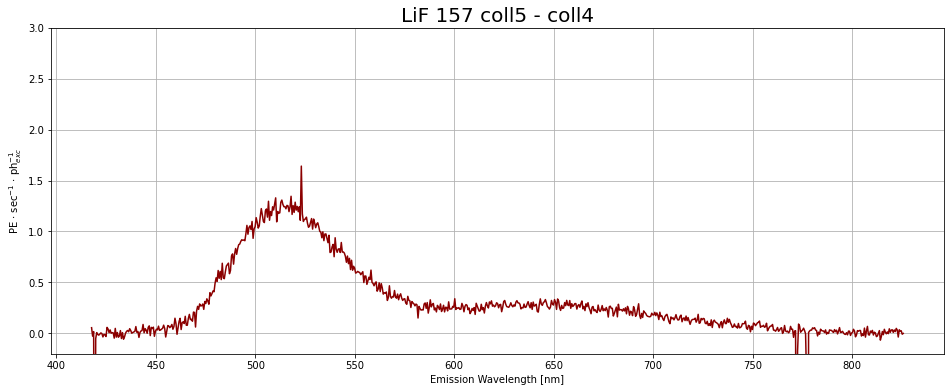

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


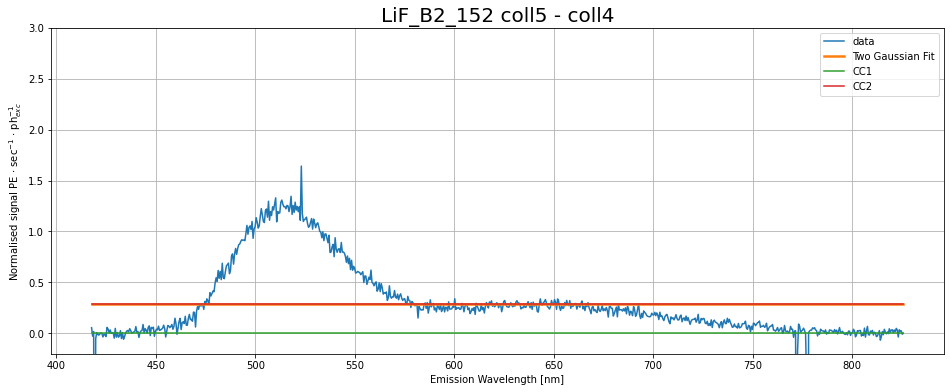

In [19]:
wl = '430'; t = '30.0'
col = 'darkred'

sp_x_2, sp_norm_2 = plot(lif_157_c4, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(lif_157_430_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,3)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll5 - coll4', fontsize = 20)

plt.show();

tot_areas = []
cc1_areas = []
cc2_areas = []

x1, y1 = calc_diff(lif_157_c4, lif_157_430_c5, '430', '30.0', toplot = False)
popt, pcov = curve_fit(two_gauss,x1, y1, p0=[530,680,20,80,1e-12,1e-12])

y_opt = []
y_530 = []
y_680 = []
for x in x1:
    y_opt.append(two_gauss(x, *popt))
    y_530.append(gaussian(x, popt[0],popt[2], popt[4]))
    y_680.append(gaussian(x, popt[1], popt[3], popt[5]))

plt.plot(x1,y1, linewidth = 1.5, label='data')
plt.plot(x1, y_opt, linewidth = 2.5, label = 'Two Gaussian Fit')
plt.plot(x1, y_530, label = 'CC1')
plt.plot(x1, y_680, label ='CC2')
plt.grid("on")
plt.legend()
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'Normalised signal PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.ylim(-0.2,3)
plt.title("LiF_B2_152 coll5 - coll4", fontsize=20)
plt.show()

tot_area = np.trapz(y_opt, x1)
cc1_area = np.trapz(y_530, x1)
cc2_area = np.trapz(y_680, x1)

tot_areas.append(tot_area)
cc1_areas.append(cc1_area)
cc2_areas.append(cc2_area)

lif_157_tot_ii = tot_areas
lif_157_cc1_ii = cc1_areas
lif_157_cc2_ii = cc2_areas

# BaF_B2_185

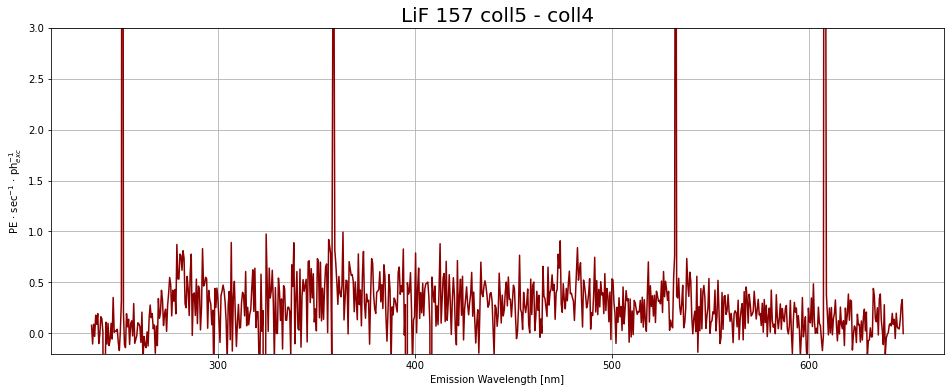

In [20]:
wl = '250'; t = '45.0'
col = 'darkred'

sp_x_2, sp_norm_2 = plot(baf_185_c4, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(baf_185_250_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,3)

plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll5 - coll4', fontsize = 20)

plt.show();

# BaF_B2_194

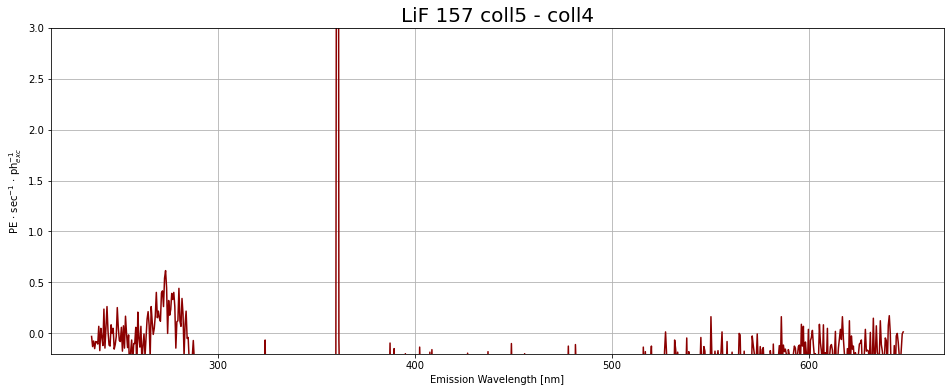

In [21]:
wl = '250'; t = '45.0'
col = 'darkred'

sp_x_2, sp_norm_2 = plot(baf_194_c4, wl, t, plot=False); sp_x_3, sp_norm_3 =  plot(baf_194_250_c5, wl, t, plot=False)

diff = np.subtract(sp_norm_3, sp_norm_2)
plt.plot(sp_x_2, diff, color=col)
plt.ylim(-0.2,3)


plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'PE $\cdot$ sec$^{-1}$ $\cdot$ ph$_{exc}^{-1}$')
plt.grid("on")
plt.title('LiF 157 coll5 - coll4', fontsize = 20)

plt.show();